In [1]:
import numpy as np
import matplotlib.pyplot as plt
#for generating random numbers
from numpy.random import seed, randint
import math
import pandas as pd
from scipy.stats import skewnorm
from functions import *
from customplotting.general import plot_xy, save_fig

In [2]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

### Generate skewed normal random array of lifetime values

In [3]:
seed(10)
# tau_vals = randint(1,1000,100)*1e-9 # convert to s
# create a skewed noraml distribution
tau_vals = skewnorm.rvs(a = 10, loc = 50, scale=100, size=100) *1e-9

In [4]:
np.average(tau_vals)

1.245844614013999e-07

Text(0.5, 0, 'Tau values (ns)')

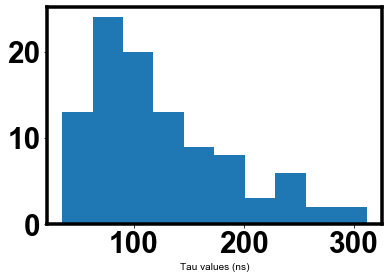

In [5]:
plt.figure()
plt.hist(tau_vals*1e9)
plt.xlabel("Tau values (ns)")

Text(0.5, 0, 'Tau values (ns)')

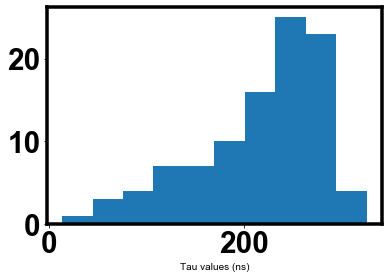

In [51]:
tau_vals_left = skewnorm.rvs(a = -10, loc = 300, scale=100, size=100) *1e-9
plt.figure()
plt.hist(tau_vals_left*1e9)
plt.xlabel("Tau values (ns)")

### Generate time array

In [9]:
t = np.linspace(0,5000,num=1000)*1e-9 # converted to s

### Generate single exponentials and average them to see the stretched behavior

1) Skewed distribution with right tail

In [10]:
I_vals = []

for i in range(len(tau_vals)):
    I_vals.append(generate_single_exp(t,tau_vals[i]))
    
I_vals = np.asarray(I_vals)
#Average Trace
I_avg = np.average(I_vals,axis=0)

(1e-08, 1.5)

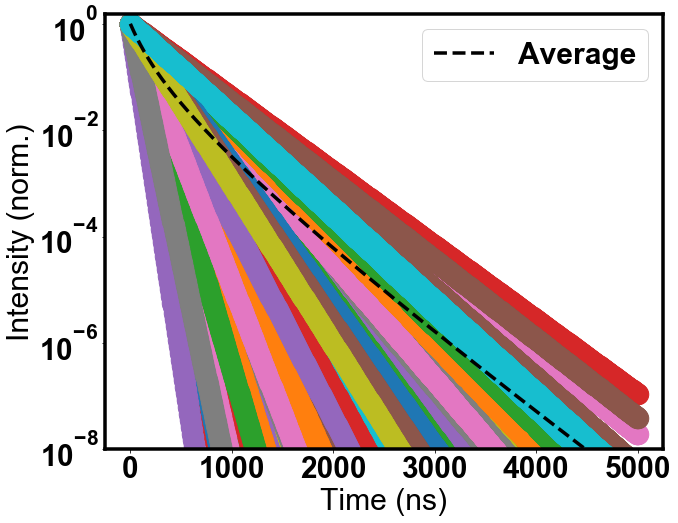

In [11]:
plt.figure(figsize=(10,8))
for i in range(len(tau_vals)):
    plt.plot(t*1e9,I_vals[i],'o')
plt.plot(t*1e9,I_avg,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()
plt.ylim(1e-8,1.5)

2) Skewed distribution left tail

In [12]:
I_vals_left = []

for i in range(len(tau_vals_left)):
    I_vals_left.append(generate_single_exp(t,tau_vals_left[i]))
    
I_vals_left = np.asarray(I_vals_left)
#Average Trace
I_avg_left = np.average(I_vals_left,axis=0)

(1e-12, 1.5)

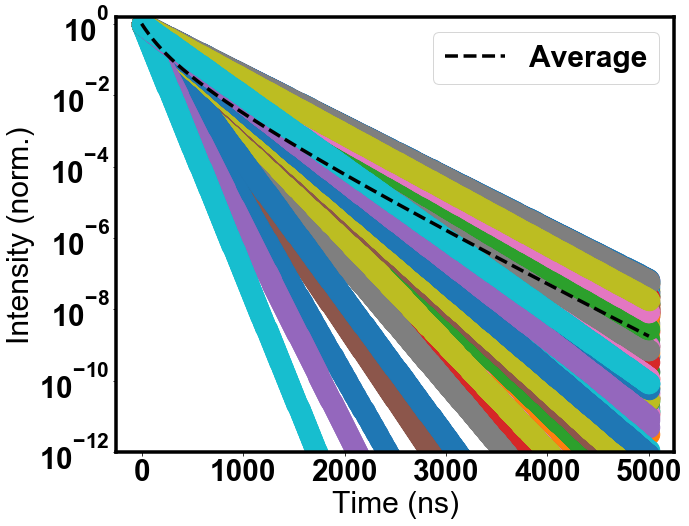

In [13]:
plt.figure(figsize=(10,8))
for i in range(len(tau_vals_left)):
    plt.plot(t*1e9,I_vals_left[i],'o')
plt.plot(t*1e9,I_avg,'k--', label="Average")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.legend()
plt.ylim(1e-12,1.5)

### Fit average decay with stretched exponential, double exponential and single exponential 

1) Right tail

In [14]:
stretched_exp = stretch_exp_fit(I_avg/np.max(I_avg), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

tau_c (ns) = 95.85761961047433
Beta = 0.759671212344693
avg. tau (ns) = 112.94961401614826


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  return ((a * np.exp(-((1.0 / tc) * t) ** beta)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:31: RuntimeWarning: invalid value encountered in multiply
  return ((a * np.exp(-((1.0 / tc) * t) ** beta)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:47: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [15]:
double_exp = double_exp_fit(I_avg/np.max(I_avg), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

tau1 (ns) = 90.15351868201812
a1 = 0.7134758323675287
tau2 (ns) = 227.65045177852016
a2 = 0.2649137417422675
avg. tau (ns) = 127.38288823843669


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t) ))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:71: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t) ))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:91: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [16]:
single_exp = single_exp_fit(I_avg/np.max(I_avg), t)
print("tau (ns) = "+str(single_exp[0]*1e9))
print("a = "+str(single_exp[1]))
print("avg. tau (ns) = "+str(single_exp[2]*1e9))

tau (ns) = 167.45375275576393
a = 0.7651245968852074
avg. tau (ns) = 167.45375275576393


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:116: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:116: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t)))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:132: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [17]:
triple_exp = triple_exp_fit(I_avg/np.max(I_avg), t)
print("tau1 (ns) = "+str(triple_exp[0]*1e9))
print("a1 = "+str(triple_exp[1]))
print("tau2 (ns) = "+str(triple_exp[2]*1e9))
print("a2 = "+str(triple_exp[3]))
print("tau3 (ns) = "+str(triple_exp[4]*1e9))
print("a3 (ns) = "+str(triple_exp[5]))
print("avg. tau (ns) = "+str(triple_exp[6]*1e9))

tau1 (ns) = 67.49922952312357
a1 = 0.442608416251752
tau2 (ns) = 261.4386780751391
a2 = 0.12544566085108189
tau3 (ns) = 144.05410528451486
a3 (ns) = 0.4298672424163216
avg. tau (ns) = 124.85575103060565


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:180: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t) ))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:180: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t) ))
/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:201: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


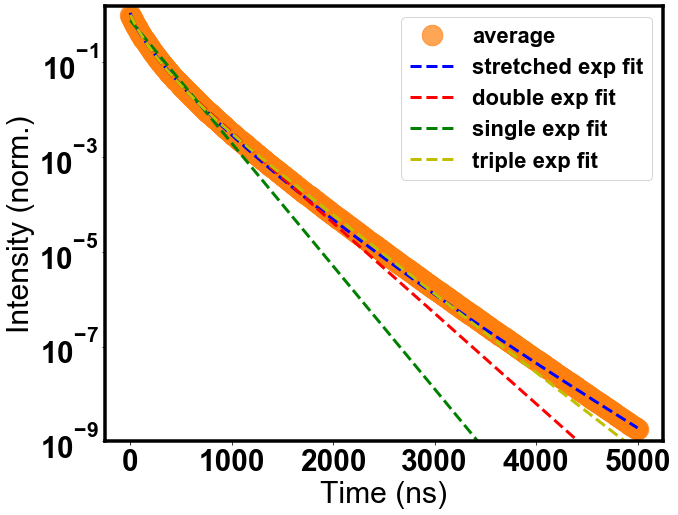

In [18]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, I_avg/np.max(I_avg),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, single_exp[3], 'g--', lw = 3, label="single exp fit")
plt.plot(t*1e9, triple_exp[7], 'y--', lw = 3, label="triple exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.ylim(1e-9,1.5)
plt.legend(fontsize=22)

2) Left Tail

In [40]:
stretched_exp_left = stretch_exp_fit(I_avg_left/np.max(I_avg_left), t)
print("tau_c (ns) = "+str(stretched_exp_left[0]*1e9))
print("Beta = "+str(stretched_exp_left[1]))
print("avg. tau (ns) = "+str(stretched_exp_left[3]*1e9))

tau_c (ns) = 216.96340105026835
Beta = 0.9322374405353046
avg. tau (ns) = 224.1103429919046


In [41]:
double_exp_left = double_exp_fit(I_avg_left/np.max(I_avg_left), t)
print("tau1 (ns) = "+str(double_exp_left[0]*1e9))
print("a1 = "+str(double_exp_left[1]))
print("tau2 (ns) = "+str(double_exp_left[2]*1e9))
print("a2 = "+str(double_exp_left[3]))
print("avg. tau (ns) = "+str(double_exp_left[4]*1e9))

tau1 (ns) = 268.10828576887513
a1 = 0.642242874604439
tau2 (ns) = 157.4117163031388
a2 = 0.35272610712413816
avg. tau (ns) = 228.86528348772725


In [42]:
single_exp_left = single_exp_fit(I_avg_left/np.max(I_avg_left), t)
print("tau (ns) = "+str(single_exp_left[0]*1e9))
print("a = "+str(single_exp_left[1]))
print("avg. tau (ns) = "+str(single_exp_left[2]*1e9))

tau (ns) = 241.52746900368263
a = 0.9443546973507548
avg. tau (ns) = 241.52746900368263


/Users/margheritataddei/Desktop/Documenti/U_Washington/Ginger_Lab/TRPL/GitHub/TimeResolvedPL/functions.py:132: RuntimeWarning: overflow encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [43]:
triple_exp_left = triple_exp_fit(I_avg_left/np.max(I_avg_left), t)
print("tau1 (ns) = "+str(triple_exp_left[0]*1e9))
print("a1 = "+str(triple_exp_left[1]))
print("tau2 (ns) = "+str(triple_exp_left[2]*1e9))
print("a2 = "+str(triple_exp_left[3]))
print("tau3 (ns) = "+str(triple_exp_left[4]*1e9))
print("a3 (ns) = "+str(triple_exp_left[5]))
print("avg. tau (ns) = "+str(triple_exp_left[6]*1e9))

tau1 (ns) = 280.17904195955003
a1 = 0.45571230952047087
tau2 (ns) = 199.31197386972417
a2 = 0.46289445811312896
tau3 (ns) = 95.58243263900694
a3 (ns) = 0.08105863364808358
avg. tau (ns) = 227.76543784456103


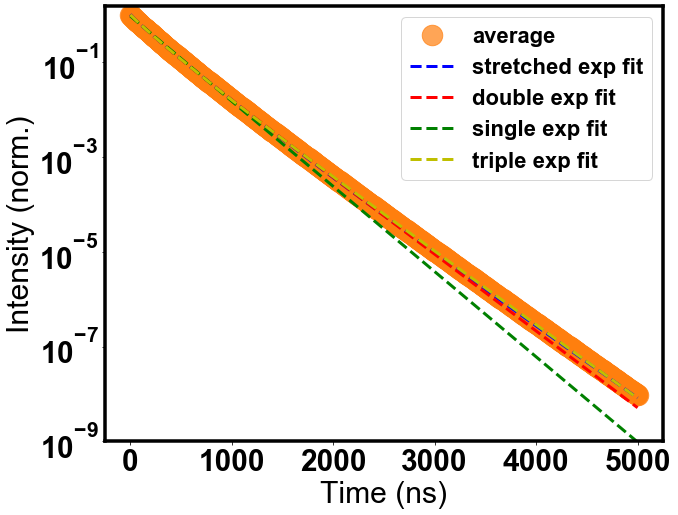

In [44]:
# plot
plt.figure(figsize=(10,8))
plt.plot(t*1e9, I_avg_left/np.max(I_avg_left),'C1o', alpha=0.7,label="average")
plt.plot(t*1e9, stretched_exp_left[4], 'b--', lw = 3, label="stretched exp fit")
plt.plot(t*1e9, double_exp_left[5], 'r--', lw = 3, label="double exp fit")
plt.plot(t*1e9, single_exp_left[3], 'g--', lw = 3, label="single exp fit")
plt.plot(t*1e9, triple_exp_left[7], 'y--', lw = 3, label="triple exp fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30)
plt.ylabel("Intensity (norm.)", fontsize=30)
plt.ylim(1e-9,1.5)
plt.legend(fontsize=22)

### Calculate the SRV for each lifetime of the 20 data series

From *Jian, Sarthak, ACS Energy Lett. 2019, 4, 222−227* I took the equation to calculate the SRV.

The average tau I calculated above is the same as the tau effective of the paper. This means that is equal to the sum of the reciprocal of the lifetime in the bulk and in the surface:

$\frac{1}{\tau_{eff}}$ = $\frac{1}{\tau_{b}}$ + $\frac{1}{\tau_{s}}$

The $\tau_{s}$ comes to play in the surface recombination velocity calculation along with *W* (thickness) and *D* (diffusion constant) 

*D* can be measured by the Einstein relationship: 

$D = \mu\cdot K_{b}\cdot T$

Where *$\mu$* is the measured carrier mboility values. 

There are two equations used to calculate SRV which describe two different device cases:

**1) $SRV_{1}$ is approximated to zero**

when the SRV on one contact is much greater than the other one on the other contact

$\tau_{s}$ = $\frac{W}{SRV_{2}}$ + $\frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2$

***equation 1*** : $SRV_{2}$ = $\frac{W}{\tau_{s} - \frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2}$ 

**1) $SRV_{1}$ = $SRV_{2}$ is approximated to zero**

SRV at the top and the bottom interfaces are the same

$\tau_{s}$ = $\frac{W}{2SRV}$ + $\frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2$

***equation 2*** : $SRV$ = $\frac{W}{2 \left[ \tau_{s} - \frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2 \right]}$ 

I considered the values of the previous studied films of *$Cs_{17}Br_{15}$* :

- $\mu$ = 35 $cm^2 V^{-1} s^{-1}$
- $D$ = 0.9 $cm^2 s^{-1}$
- $W$ = 400 $nm$ = 0.00004 $cm$

Approaches to calculate $\tau_{b}$ : 

1) One approach to determine $\tau_{b}$  is to measure and extrapolate $\tau_{b}$ from a very thick sample series  where bulk recombination dominates over surface recombination. 

2) The second approach is the Lewis base passivation using TOPO on MAPI which only bound the surface. For this reason, all the remaining recomination that decrease the PLQE is due to the bulk. 
This method allows us to establish a lower limit for the corresponding bulk lifetime ($\tau_{b}$  > 8 μ s) because surface passivation alone can restore well-prepared samples to such levels of performance. 

***equation 1*** : $SRV_{2}$ = $\frac{W}{\tau_{s} - \frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2}$ 

***equation 2*** : $SRV$ = $\frac{W}{2 \left[ \tau_{s} - \frac{4}{D}\cdot \left( \frac{W}{\pi} \right)^2 \right]}$ 

In [19]:
tau_eff = tau_vals

In [20]:
tau_surf = calculate_surface_lifetime(tau_eff, bulk_lifetime=8000)

In [21]:
# coverting tau_surf to 'cm' units
SRV1_zero, SRV1_SRV2_equal = calculate_srv(tau_surf*1e9, diffusion_coefficient=0.9, thickness=400) #diffusion coeff in cm2/s, thickness in nm

- Calculating the average of the SRV calculated in equation one and two

In [22]:
sim_SRV1_0_ = np.average(SRV1_zero,axis=0)
print(sim_SRV1_0_)

412.2916012224352


In [23]:
sim_SRV1_SRV2_eq_ = np.average(SRV1_SRV2_equal,axis=0)
print(sim_SRV1_SRV2_eq_)

204.73157725958737


#### SRV from average tau of streched exponential fitting:


In [24]:
SRV1_0_str, SRV1_SRV2_eq_str = calculate_srv(stretched_exp[3]*1e9)

In [25]:
print("SRV1 = 0")
print("SRV = "+str(SRV1_0_str))
print("SRV1 = SRV2")
print("SRV = "+str(SRV1_SRV2_eq_str))

SRV1 = 0
SRV = 356.4137751470889
SRV1 = SRV2
SRV = 177.35293871733433


#### SRV from average tau of double exponential fitting:

In [26]:
SRV1_0_db, SRV1_SRV2_eq_db = calculate_srv(double_exp[4]*1e9)

In [27]:
print("SRV1 = 0")
print("SRV = "+str(SRV1_0_db))
print("SRV1 = SRV2")
print("SRV = "+str(SRV1_SRV2_eq_db))

SRV1 = 0
SRV = 315.8001559311931
SRV1 = SRV2
SRV = 157.2292907349141


#### SRV from only tau2 of double exponential fitting

In [28]:
SRV1_0_db_t2, SRV1_SRV2_eq_db_t2 = calculate_srv(double_exp[2]*1e9)

In [29]:
print("SRV1 = 0")
print("SRV = "+str(SRV1_0_db_t2))
print("SRV1 = SRV2")
print("SRV = "+str(SRV1_SRV2_eq_db_t2))

SRV1 = 0
SRV = 176.26585110708191
SRV1 = SRV2
SRV = 87.92355653333317


#### SRV from average tau of single exponential fitting:


In [30]:
SRV1_0_si, SRV1_SRV2_eq_si = calculate_srv(single_exp[2]*1e9)

In [31]:
print("SRV1 = 0")
print("SRV = "+str(SRV1_0_si))
print("SRV1 = SRV2")
print("SRV = "+str(SRV1_SRV2_eq_si))

SRV1 = 0
SRV = 239.90416323700674
SRV1 = SRV2
SRV = 119.56457484362888


#### SRV from tau3 of triple exponential fitting:

In [32]:
SRV1_0_t3, SRV1_SRV2_t3 = calculate_srv(triple_exp[4]*1e9)

In [33]:
print("SRV1 = 0")
print("SRV = "+str(SRV1_0_t3))
print("SRV1 = SRV2")
print("SRV = "+str(SRV1_SRV2_t3))

SRV1 = 0
SRV = 279.0692500155566
SRV1 = SRV2
SRV = 139.01054364197552


#### SRV from average tau of triple exponential fitting

In [34]:
SRV1_0_tp, SRV1_SRV2_tp = calculate_srv(triple_exp[6]*1e9)

In [35]:
print("SRV1 = 0")
print("SRV = "+str(SRV1_0_tp))
print("SRV1 = SRV2")
print("SRV = "+str(SRV1_SRV2_tp))

SRV1 = 0
SRV = 322.22919488260544
SRV1 = SRV2
SRV = 160.41628091385437


### Compare each SRV calculated from different fits to true simulated average

Text(0.5, 0, 'SRV (cm/s)')

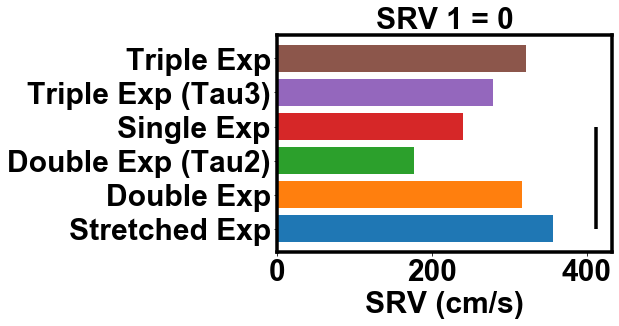

In [38]:
plt.figure()
plt.title("SRV 1 = 0", fontsize=30, fontweight="bold")
plt.barh("Stretched Exp", SRV1_0_str)
plt.barh("Double Exp", SRV1_0_db)
plt.barh("Double Exp (Tau2)", SRV1_0_db_t2)
plt.barh("Single Exp", SRV1_0_si)
plt.barh("Triple Exp (Tau3)", SRV1_0_t3)
plt.barh("Triple Exp", SRV1_0_tp)
plt.vlines(sim_SRV1_0_, "Stretched Exp", "Single Exp")

plt.xlabel("SRV (cm/s)", fontsize=30, fontweight="bold")

Text(0.5, 0, 'SRV (cm/s)')

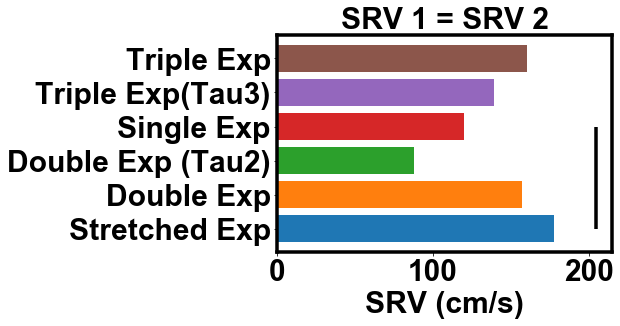

In [39]:
plt.figure()
plt.title("SRV 1 = SRV 2", fontsize=30, fontweight="bold")
plt.barh("Stretched Exp", SRV1_SRV2_eq_str)
plt.barh("Double Exp", SRV1_SRV2_eq_db)
plt.barh("Double Exp (Tau2)", SRV1_SRV2_eq_db_t2)
plt.barh("Single Exp", SRV1_SRV2_eq_si)
plt.barh("Triple Exp(Tau3)", SRV1_SRV2_t3)
plt.barh("Triple Exp", SRV1_SRV2_tp)
plt.vlines(sim_SRV1_SRV2_eq_, "Stretched Exp", "Single Exp")

plt.xlabel("SRV (cm/s)", fontsize=30, fontweight="bold")

### Conclusion:

From the SRV results we can see that the most accurate approximation is given by the streched exponential fitting

In [52]:
tau_surf_left = calculate_surface_lifetime(tau_vals_left, bulk_lifetime=8000)

In [53]:
SRV1_zero_left, SRV1_SRV2_equal_left = calculate_srv(tau_surf_left*1e9, diffusion_coefficient=0.9, thickness=400) 

In [54]:
avg_SRV1_0_left = np.average(SRV1_zero_left,axis=0)
print(avg_SRV1_0_left)

241.14087784972725


In [55]:
avg_SRV1_SRV2_left = np.average(SRV1_SRV2_equal_left,axis=0)
print(avg_SRV1_SRV2_left)

119.58161712855963


- Streched exponential fitting

In [69]:
SRV1_0_left_str, SRV1_SRV2_left_str = calculate_srv(stretched_exp_left[3]*1e9)

In [70]:
print("SRV1 = 0")
print("SRV = "+str(SRV1_0_left_str))
print("SRV1 = SRV2")
print("SRV = "+str(SRV1_SRV2_left_str))

SRV1 = 0
SRV = 179.05917553594205
SRV1 = SRV2
SRV = 89.31353846599961


- Single exponential

In [65]:
SRV1_0_left_si, SRV1_SRV2_left_si = calculate_srv(single_exp_left[2]*1e9)
print("SRV1 = 0")
print("SRV = "+str(SRV1_0_left_si))
print("SRV1 = SRV2")
print("SRV = "+str(SRV1_SRV2_left_si))

SRV1 = 0
SRV = 166.10815374032387
SRV1 = SRV2
SRV = 82.86811777813669


- Double exponential

In [67]:
SRV1_0_left_db, SRV1_SRV2_left_db = calculate_srv(double_exp_left[4]*1e9)

In [68]:
print("SRV1 = 0")
print("SRV = "+str(SRV1_0_left_db))
print("SRV1 = SRV2")
print("SRV = "+str(SRV1_SRV2_left_db))

SRV1 = 0
SRV = 175.327265759146
SRV1 = SRV2
SRV = 87.45648501066573


- Tau 2

In [64]:
SRV1_0_left_t2, SRV1_SRV2_left_t2 = calculate_srv(double_exp_left[2]*1e9)
print("SRV1 = 0")
print("SRV = "+str(SRV1_0_left_t2))
print("SRV1 = SRV2")
print("SRV = "+str(SRV1_SRV2_left_t2))

SRV1 = 0
SRV = 255.27915683554164
SRV1 = SRV2
SRV = 127.20090174776763


- Triple exponential

In [60]:
SRV1_0_left_tp, SRV1_SRV2_left_tp = calculate_srv(triple_exp_left[6]*1e9)

In [62]:
print("SRV1 = 0")
print("SRV = "+str(SRV1_0_left_tp))
print("SRV1 = SRV2")
print("SRV = "+str(SRV1_SRV2_left_tp))

SRV1 = 0
SRV = 176.1765819186051
SRV1 = SRV2
SRV = 87.87913370208574


- Tau 3

In [63]:
SRV1_0_left_t3, SRV1_SRV2_left_t3 = calculate_srv(triple_exp_left[4]*1e9)
print("SRV1 = 0")
print("SRV = "+str(SRV1_0_left_t3))
print("SRV1 = SRV2")
print("SRV = "+str(SRV1_SRV2_left_t3))

SRV1 = 0
SRV = 421.66548265833256
SRV1 = SRV2
SRV = 209.63853830815847


Text(0.5, 0, 'SRV (cm/s)')

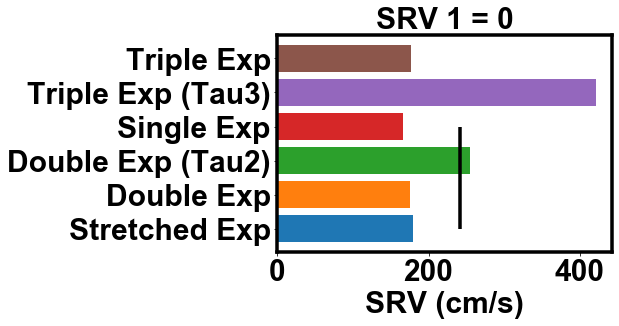

In [66]:
plt.figure()
plt.title("SRV 1 = 0", fontsize=30, fontweight="bold")
plt.barh("Stretched Exp", SRV1_0_left_str)
plt.barh("Double Exp", SRV1_0_left_db)
plt.barh("Double Exp (Tau2)", SRV1_0_left_t2)
plt.barh("Single Exp", SRV1_0_left_si)
plt.barh("Triple Exp (Tau3)", SRV1_0_left_t3)
plt.barh("Triple Exp", SRV1_0_left_tp)
plt.vlines(avg_SRV1_0_left, "Stretched Exp", "Single Exp")

plt.xlabel("SRV (cm/s)", fontsize=30, fontweight="bold")

Text(0.5, 0, 'SRV (cm/s)')

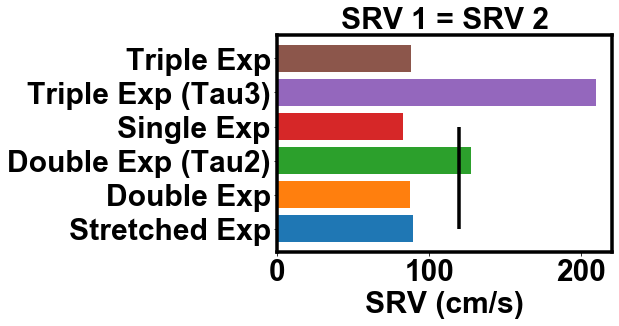

In [71]:
plt.figure()
plt.title("SRV 1 = SRV 2", fontsize=30, fontweight="bold")
plt.barh("Stretched Exp", SRV1_SRV2_left_str)
plt.barh("Double Exp", SRV1_SRV2_left_db)
plt.barh("Double Exp (Tau2)", SRV1_SRV2_left_t2)
plt.barh("Single Exp", SRV1_SRV2_left_si)
plt.barh("Triple Exp (Tau3)", SRV1_SRV2_left_t3)
plt.barh("Triple Exp", SRV1_SRV2_left_tp)
plt.vlines(avg_SRV1_SRV2_left, "Stretched Exp", "Single Exp")

plt.xlabel("SRV (cm/s)", fontsize=30, fontweight="bold")